# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
import csv
from pprint import pprint
import datetime
%matplotlib inline
%matplotlib notebook


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [36]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [25]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
print('------------------------')
print('Beginning Data Retrieval')
print('------------------------')


new_cities = []
cloudiness = []
country = []
date = []
humidity = []
temp = []
lat = []
lng = []
wind = []
record_counter = 0
set_counter = 0

for city in cities:
    query_url = url + "&q=" + city
    # Get weather data
    response = requests.get(query_url).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0

    print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))
    print(url)
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        new_cities.append(city)
    except:
        print("City not found!")
        pass

print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

------------------------
Beginning Data Retrieval
------------------------
Processing record 1 of set 0 | port alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 2 of set 0 | hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 3 of set 0 | airai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 4 of set 0 | irun
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 5 of set 0 | mys shmidta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
City not found!
Processing record 6 of set 0 | albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 7 of set 0 | manta
http://api.openweathermap.org/dat

Processing record 8 of set 1 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 9 of set 1 | suzu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
City not found!
Processing record 10 of set 1 | jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 11 of set 1 | lasa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 12 of set 1 | fort nelson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 13 of set 1 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 14 of set 1 | avera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2

Processing record 14 of set 2 | vila velha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 15 of set 2 | mahibadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 16 of set 2 | barrow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 17 of set 2 | nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 18 of set 2 | doha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 19 of set 2 | port lincoln
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 20 of set 2 | lavrentiya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070


Processing record 20 of set 3 | la palma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 21 of set 3 | lodja
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 22 of set 3 | shahr-e babak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 23 of set 3 | kieta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 24 of set 3 | kirakira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 25 of set 3 | terrace
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 26 of set 3 | longyearbyen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Proc

Processing record 27 of set 4 | baculin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 28 of set 4 | begoro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 29 of set 4 | cumana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 30 of set 4 | venado tuerto
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 31 of set 4 | okhotsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 32 of set 4 | jashpurnagar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 33 of set 4 | hofn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Process

Processing record 33 of set 5 | yueyang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 34 of set 5 | sarahan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 35 of set 5 | cumra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 36 of set 5 | kovdor
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 37 of set 5 | jagtial
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 38 of set 5 | djibo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 39 of set 5 | hudson bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing reco

Processing record 40 of set 6 | ulaanbaatar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 41 of set 6 | wattegama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 42 of set 6 | itarema
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 43 of set 6 | diamantino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 44 of set 6 | shetpe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 45 of set 6 | marcona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
City not found!
Processing record 46 of set 6 | izumo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306

Processing record 46 of set 7 | necochea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 47 of set 7 | polis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 48 of set 7 | mananjary
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 49 of set 7 | aracati
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 50 of set 7 | guerrero negro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 0 of set 8 | adwa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 1 of set 8 | tual
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing re

Processing record 2 of set 9 | kantunilkin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 3 of set 9 | soskovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 4 of set 9 | youghal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 5 of set 9 | korla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
City not found!
Processing record 6 of set 9 | changping
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 7 of set 9 | nakapiripirit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 8 of set 9 | ahar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e770

Processing record 9 of set 10 | jacksonville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 10 of set 10 | cairns
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 11 of set 10 | vila franca do campo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 12 of set 10 | port macquarie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 13 of set 10 | kuche
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
City not found!
Processing record 14 of set 10 | uthal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 15 of set 10 | charlottesville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&AP

Processing record 16 of set 11 | inhuma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 17 of set 11 | yaan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 18 of set 11 | isetskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 19 of set 11 | bilibino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 20 of set 11 | cienaga de flores
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
City not found!
Processing record 21 of set 11 | anadyr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a626e30306e2e77070
Processing record 22 of set 11 | hihifo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3403293c2ba199a6

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
# Export the city data into csv file

cities_list = zip(new_cities,cloudiness,country,date,humidity,temp,lat,lng)
# Set variable for output file
output_file = os.path.join('cities_output.csv')
#  Open the output file
with open(output_file, 'w') as datafile:
    weather_data.to_csv(output_file)

# Create dictionary to hold city and weather data
weather_dict = {
    "City": new_cities,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Temp": temp,
    "Lat" : lat,
    "Lng" : lng,   
    "Wind Speed" : wind
}

In [28]:
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Temp,Lat,Lng,Wind Speed
0,port alfred,77,ZA,1577756255,83,64.00,-33.59,26.89,8.14
1,hilo,40,US,1577756255,57,80.60,19.71,-155.08,11.41
2,airai,83,TL,1577756256,57,82.47,-8.93,125.41,3.87
3,irun,3,FR,1577756256,80,48.00,43.34,-1.79,6.93
4,albany,90,US,1577756126,80,35.60,42.65,-73.75,4.70


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

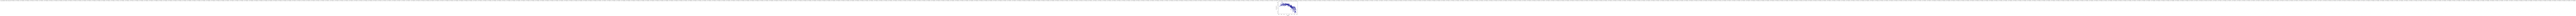

In [32]:
# Lat vs Temp Plot

weather_data.plot(kind='scatter', x='Lat', y='Temp', c='DarkBlue')
plt.title('City Latitude Vs Max Temp ({})'.format(date))
plt.xlabel('Latitude')
plt.ylabel('Max temp (F)')
plt.grid()
plt.savefig("../images/LatitudeVsTemperature.png")

#### Latitude vs. Humidity Plot

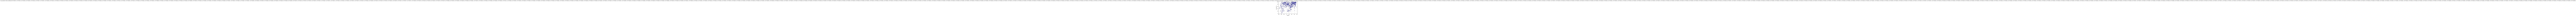

In [66]:
# Latitude Vs Humidity
%matplotlib inline
weather_data.plot(kind='scatter',x='Lat',y='Humidity', c='DarkBlue')
plt.title('City Latitude Vs Max Humidity ({})'.format(date))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig("../images/LatitudeVsHumidity.png")

# Trying to get the plot to show because it's so very tiny but these lines did not work.
# matplotlib.rcParams['figure.figsize'] = (20, 16)
# matplotlib.rcParams['figure.dpi'] = 200
plt.show()

#### Latitude vs. Cloudiness Plot

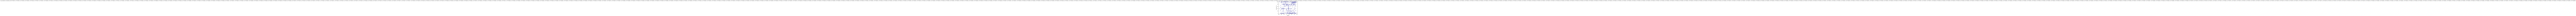

In [65]:
# Latitude Vs Cloudiness

weather_data.plot(kind='scatter',x='Lat',y='Cloudiness', c='DarkBlue')
plt.title('City Latitude Vs Cloudiness ({})'.format(date))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("../images/LatitudeVsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

In [ ]:
# Latitude Vs Wind Speed

weather_data.plot(kind='scatter',x='Lat',y='Wind Speed', c='DarkBlue')
plt.title('City Latitude Vs Wind Speed ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig("../images/LatitudeVsWindSpeed.png")